In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [38]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv(r"D:\Personal\Learnings\Machine Learning\Machine Learning Algorithms\Machine-Learning-Projects\Day29_Machine Learning Pipelines\train.csv", usecols=['Age', 'Fare', 'Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
X =df.iloc[:,1:3]
y = df.iloc[:,0]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.head(2)

,Age,Fare
331,45.5,28.5
733,23.0,13.0


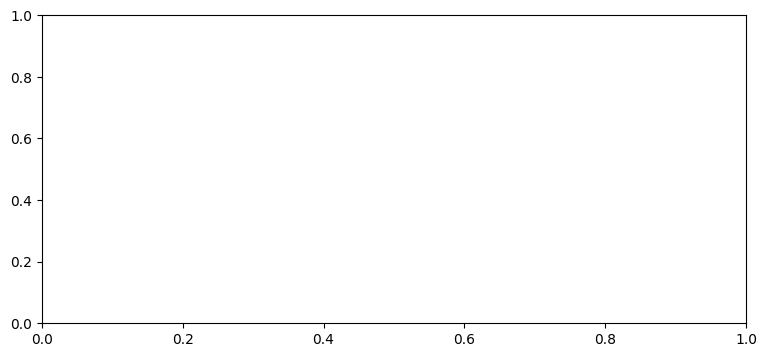

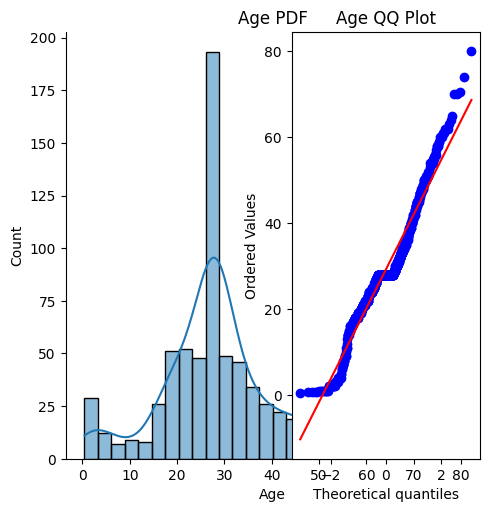

In [15]:
plt.figure(figsize=(20,4))
plt.subplot(121)
# rowcount/columncount/firstposition
sns.displot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

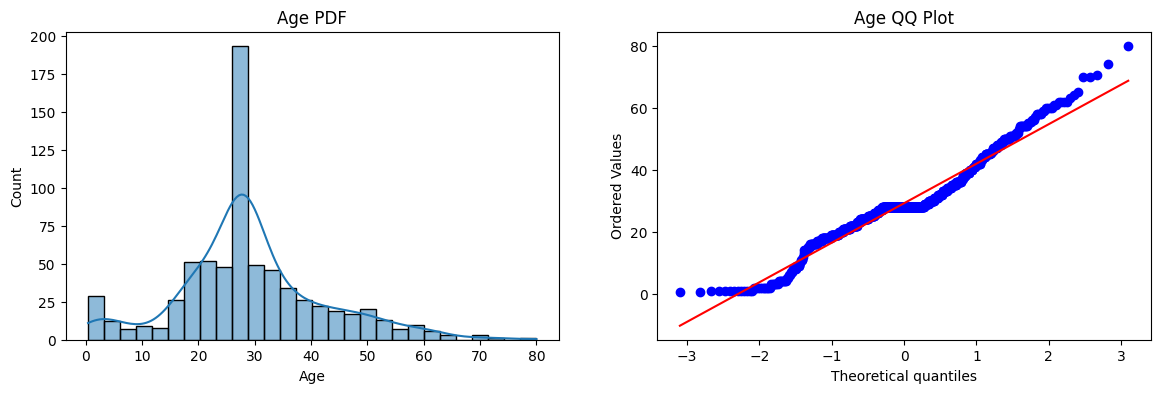

In [16]:
# Graphical Representation of Age Column
fig, axes = plt.subplots(1,2, figsize=(14,4))

sns.histplot(X_train['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=axes[1])
axes[1].set_title('Age QQ Plot')
plt.show()

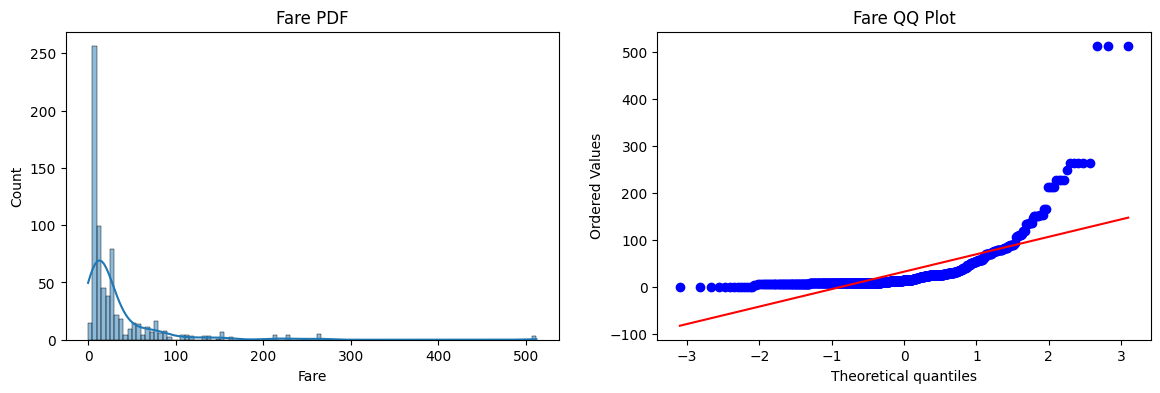

In [17]:
# Graphical Representation of Fare Column
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy Score LR: ", accuracy_score(y_test, y_pred))
print("Accuracy Score DT: ", accuracy_score(y_test, y_pred1))

Accuracy Score LR:  0.6480446927374302
Accuracy Score DT:  0.6703910614525139


In [22]:
trf = FunctionTransformer(func=np.log1p)

In [23]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [24]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy Score LR: ", accuracy_score(y_test, y_pred))
print("Accuracy Score DT: ", accuracy_score(y_test, y_pred1))

Accuracy Score LR:  0.6759776536312849
Accuracy Score DT:  0.6536312849162011


In [28]:
# Calculate Cross Validation Score
X_transformed = trf.fit_transform(X)

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6566167290886392


Text(0.5, 1.0, 'Age After Transformation')

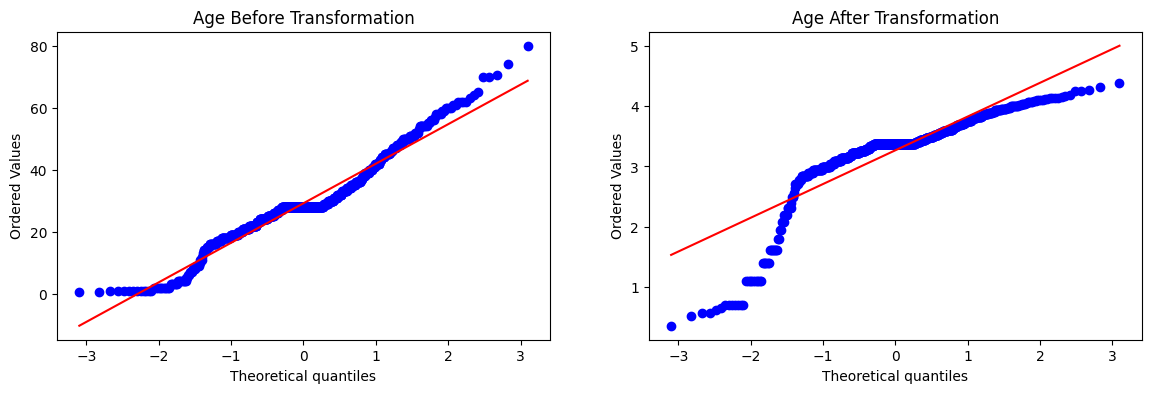

In [33]:
# Comparing the results after transformation
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Transformation')

Text(0.5, 1.0, 'Fare After Transformation')

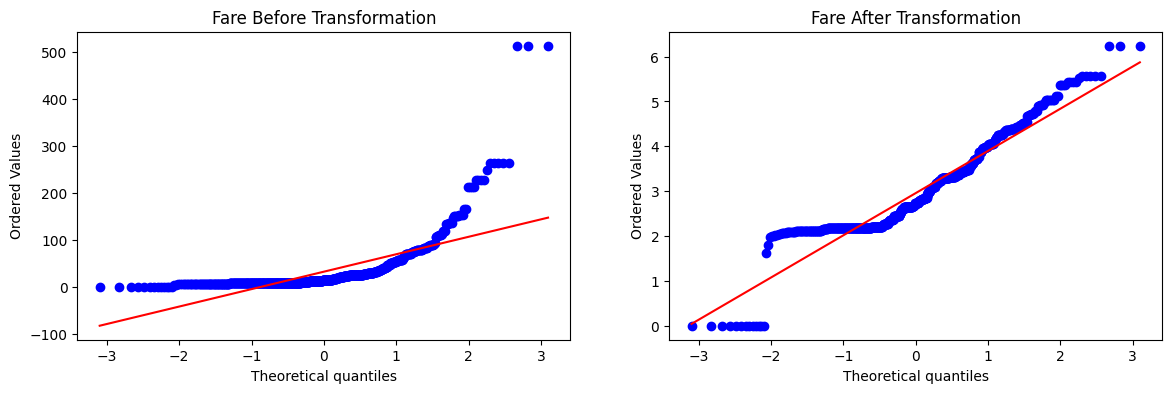

In [34]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Transformation')

In [41]:
# Redoing all the steps again using Column Transformer and Function Transformer on only Fare column.
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), [1])
], remainder= 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [44]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred3 = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy Score LR: ", accuracy_score(y_test, y_pred3))
print("Accuracy Score DT: ", accuracy_score(y_test, y_pred2))

Accuracy Score LR:  0.6759776536312849
Accuracy Score DT:  0.659217877094972


In [45]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6690137328339576
DT 0.6565792759051187


In [47]:
# Using a Function

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    clf2 = DecisionTreeClassifier()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    print("Accuracy",np.mean(cross_val_score(clf2,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.61729088639201
Accuracy 0.6049687890137327


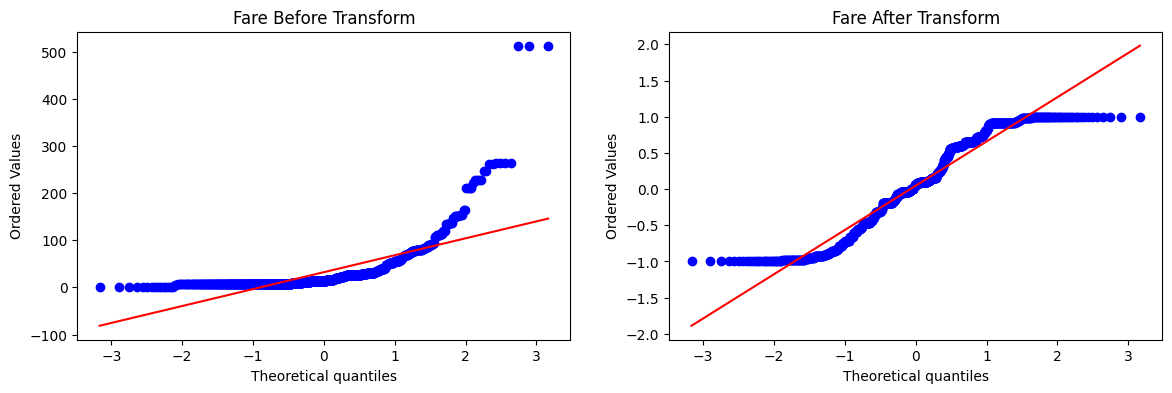

In [63]:
apply_transform(np.cos)